In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer    
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score

In [9]:
df = pd.read_csv('lung_cancer_examples.csv')
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [6]:
df.isna().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [10]:
df.drop("Name", axis=1, inplace=True)
df.drop('Surname', axis=1, inplace=True)

<Axes: >

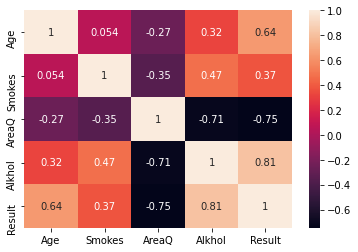

In [18]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Result'>

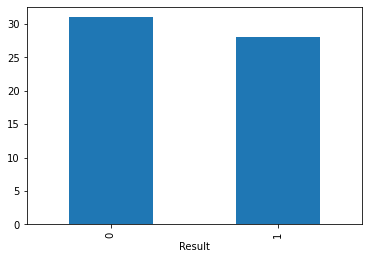

In [19]:
df.Result.value_counts().plot.bar()

In [ ]:


# Split the data into features and target
X = df.drop('Result', axis=1)
y = df['Result']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
# Create a ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', LabelEncoder())
        ]), categorical_features)
    ],
    remainder='passthrough'
)
# Create a pipeline that first applies the preprocessor and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', None)  # Placeholder for the classifier
])
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Smokes', 'AreaQ', 'Alkhol'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   LabelEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier', None)])

In [20]:


# Create a Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=5 ,random_state=42)
# Fit the classifier to the training data
pipeline.set_params(classifier=classifier)
pipeline.fit(X_train, y_train)
# Make predictions on the test set
y_pred = pipeline.predict(X_test)
# Evaluate the model
score = pipeline.score(X_test, y_test)
print(score)


0.9166666666666666


In [29]:

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



[[1.   0.  ]
 [0.25 0.75]]


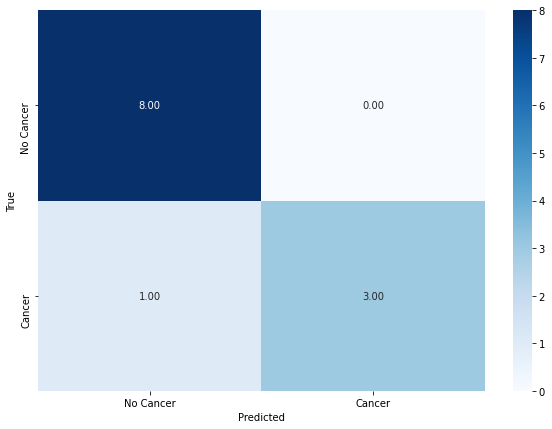

In [ ]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred, normalize='true'))

#visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
prec = precision_score(y_test, y_pred, average='weighted')
print(f"Prcision: {prec:.2f}")

Accuracy: 0.92
Prcision: 0.93


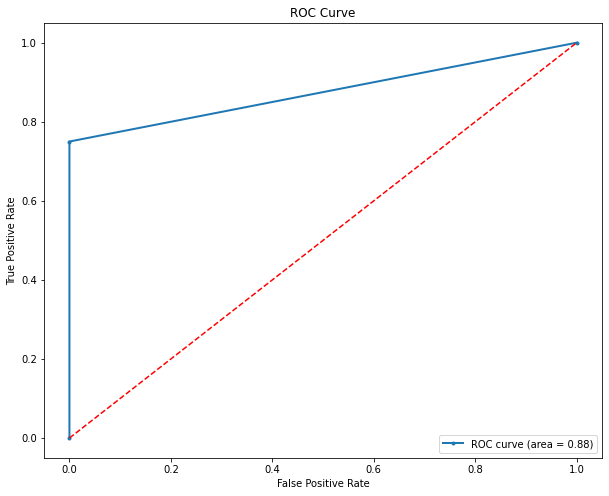

In [43]:
#roc curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, marker='.',lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()